<a href="https://colab.research.google.com/github/Brijeshtanwar/Topic-Modeling/blob/main/text_summ_llama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
url = """https://raw.githubusercontent.com/Brijeshtanwar/Topic-Modeling/main/voc_data.csv"""
df = pd.read_csv(url,  encoding = 'unicode_escape')

In [3]:
df = df[['CUSTOMER COMMENT', 'Reason']]
df.columns = ['comment', 'topic']

In [4]:
df.isnull().sum()

comment    0
topic      1
dtype: int64

In [5]:
# Drop na
df.dropna(axis=0, inplace=True)

In [6]:
df.topic.value_counts()

Service                      1570
APPLICATION (WEB/APP)        1074
SERVICE                       335
CHARGES(BRO./DP/LPC ETC.)     332
Others                        321
NOT SPECIFIED                 254
Not Specified                 216
application                   190
others                        188
People                        113
service                       105
Process                        69
charges                        47
people                         37
PEOPLE                         32
product                        20
Product                        13
PROCESS                         6
process                         4
research                        3
Name: topic, dtype: int64

In [7]:
#lower case
df['topic'] = df['topic'].str.lower()
df['topic'] = df['topic'].str.strip()
df.loc[df.topic=='not specified', 'topic'] = 'others'

In [8]:
df.topic.unique()

array(['service', 'application (web/app)', 'others',
       'charges(bro./dp/lpc etc.)', 'process', 'people', 'product',
       'application', 'charges', 'research'], dtype=object)

In [9]:
topic_dic = {'application (web/app)': 'application',  'charges(bro./dp/lpc etc.)': 'charges', 'service':'service'
, 'others':'others', 'process':'process', 'people':'people', 'product':'product'}

In [10]:
df['topic'] = df['topic'].map(topic_dic)

<Axes: xlabel='count', ylabel='topic'>

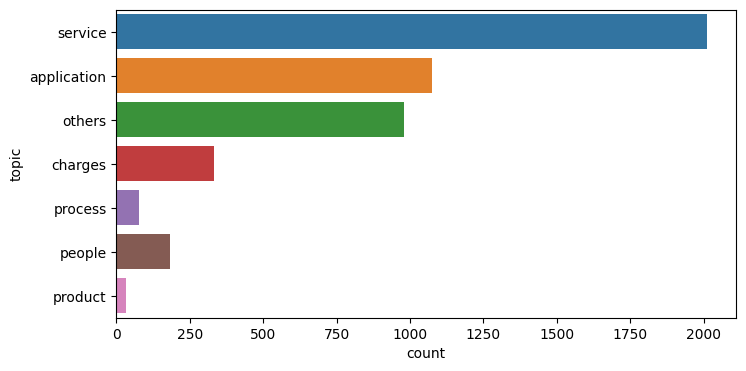

In [11]:
plt.figure(figsize=[8,4])
sns.countplot(y=df['topic'])

In [12]:
# Preprocessing

In [13]:
# Remove integer comments
df = df[df['comment'].apply(lambda x: not isinstance(x, int))]
df.reset_index(drop=True, inplace=True)

#lower case
df['comment'] = df['comment'].str.lower()

In [14]:
import re

In [15]:
def preprocess_text(text):
    ## clean (convert to lowercase and remove punctuations and  characters and then strip)
    text = re.sub(r"[^A-Za-z]+", ' ' , str(text).lower().strip())
    return text

In [16]:
df["x"] = df["comment"].apply(lambda x: preprocess_text(x))
# df['x'] = df['comment']
df['y'] = df['topic']
df.head(10)

,comment,topic,x,y
0,querries where kotak is at disadvantageous pos...,service,querries where kotak is at disadvantageous pos...,service
1,1) same-day money deduction even if we have ma...,application,same day money deduction even if we have marg...,application
2,ndejjejdjx,others,ndejjejdjx,others
3,worst website trading,application,worst website trading,application
4,"no technical support at real time, application...",service,no technical support at real time application ...,service
5,need knowledge and experience person,service,need knowledge and experience person,service
6,please revisit my brokerage and deemat charges...,charges,please revisit my brokerage and deemat charges...,charges
7,iâm waiting for resolution or a meeting with...,service,i m waiting for resolution or a meeting with m...,service
8,i dint interacted so my rating may be a bias b...,service,i dint interacted so my rating may be a bias b...,service
9,no issues with the rm,service,no issues with the rm,service


In [17]:
df = df[['x', 'y']]

In [18]:
text = ". ".join(df[df['y']=='people']['x'])

In [19]:
# SpaCy for text summarization

In [20]:
import spacy

# Load the small English model
nlp = spacy.load("en_core_web_sm")

def summarize_text(input_text, num_sentences=3):
    # Parse the input text with Spacy
    doc = nlp(input_text)

    # Extract the sentences as a list of strings
    sentences = [sent.text.strip() for sent in doc.sents]

    # Calculate the total number of sentences and the number to keep for the summary
    num_total_sentences = len(sentences)
    num_summary_sentences = min(num_sentences, num_total_sentences)

    # Calculate the "importance score" for each sentence
    scores = {}
    for i, sent in enumerate(sentences):
        # Split the sentence into individual words
        words = sent.split()

        # Calculate the average word vector for the sentence
        word_vectors = [nlp(word).vector for word in words if nlp(word).has_vector]
        if len(word_vectors) > 0:
            sent_vector = sum(word_vectors) / len(word_vectors)
        else:
            sent_vector = nlp("")[0].vector

        # Calculate the cosine similarity between the sentence vector and the document vector
        doc_vector = doc.vector
        sim = sent_vector.dot(doc_vector) / (np.linalg.norm(sent_vector) * np.linalg.norm(doc_vector))
        scores[i] = sim

    # Sort the sentences by score and keep the top N
    top_sentences = sorted(scores, key=scores.get, reverse=True)[:num_summary_sentences]

    # Sort the top sentences back into their original order
    summary = [sentences[i] for i in sorted(top_sentences)]

    # Join the summary sentences into a single string
    return " ".join(summary)


In [21]:
input_text = text
summary = summarize_text(input_text, num_sentences=5)
print(summary)


its very unfair to point out only dealer problem kotak securities is very back dated not client friendly please try to value add in various aspect knowledge technical try to reduce brokerage burden dont change dealer frequently bcoz clint dealer relationship make more confidence must improve technology part of your platform technology glitches make us most irritation . its very unfair to point out only dealer problem kotak securities is very back dated not client friendly please try to value add in various aspect knowledge technical try to reduce brokerage burden dont change dealer frequently bcoz clint dealer relationship make more confidence must improve technology part of your platform technology glitches make us most irritation . please give right training to improve theirknowledge ihave lost rs due to wrong information your bank kotak security will not survive long legal litigation will soonstart by your costmer this the fact i am saying. there should be dedicated person at branch

In [28]:
pip install sumy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 76.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21693 sha256=89995d79fa42e356dd660f17a255d9b4e13f95fb7f7324e365ac888c8f3675fc
  Stored in directory: /root/.cache/pip/wheels/64/22/90/b84fcc30e16598db20a0d41340616dbf9b1e82bbcc627b0b33
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=af87c41a1e2c32247f20fe30c0f1fe010a41dcd29df73c00bdb0a901ce33a887
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=1068

In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
import tensorflow as tf
import tensorflow_hub as hub
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

# Load the ELMo module
elmo = hub.load("https://tfhub.dev/google/elmo/3")

def generate_summary(text, num_sentences=3):
    # Preprocess the text if needed
    # ...

    # Generate ELMo embeddings for the input text
    embeddings = elmo.signatures["default"](tf.constant([text]))["elmo"]

    # Convert embeddings to numpy array
    embeddings = embeddings.numpy()

    # Reshape the embeddings
    embeddings = embeddings.reshape(-1, embeddings.shape[-1])

    # Initialize the parser and tokenizer
    parser = PlaintextParser.from_string(text, Tokenizer("english"))

    # Initialize the LexRank summarizer
    summarizer = LexRankSummarizer()

    # Generate the summary
    summary = summarizer(parser.document, num_sentences)

    # Combine the sentences into a single summary string
    summary_text = " ".join(str(sentence) for sentence in summary)

    return summary_text

In [31]:
# Example usage

summary_elmo = generate_summary(text)
print(summary_elmo)

you need to improve your system and your portal as well i have been stugling to find answers to my questions no reply since morning i have sent a mail once asked by your employee i e your dedicated person but no reply no knowledge they have no queries they are able to resolve they only say will get back once boss approve based in my request from boss very unprofessional does match up with kotak standards not a single question they answered no clarity your team has take for example todays maul of mine so far no reply to simple question leave aside what we speak on phone soon i shall shift my account useless service your helpline mos they dont have any answer and when they are uncomfortable with questions they disconnect the phone u have been struggling for answere for last days since you monitor the call for quality purspoes you can listen to my conversations very bad experience with dmat acoount. all kotak securities team is frod they dont have knowledge off there apps customer care al

In [ ]:
# Llama 2

In [32]:
!pip install -q transformers einops accelerate langchain bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.2 MB/s eta 0:00:00


In [36]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid (permission: read).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' cre

In [34]:
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.6 MB/s eta 0:00:00


In [43]:
! pip install torch==1.13.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 74.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1+cu118
    Uninstalling torch-2.0.1+cu118:
      Successfully uninstalled torch-2.0.1+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchdata 0.6.1 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchtext 0.15.2 requires torch==2.0.1, but you have torch 1.13.1 which

In [44]:
from langchain import HuggingFacePipeline
from transformers import AutoTokenizer
import transformers
import torch

model = "meta-llama/Llama-2-7b-chat-hf"

tokenizer = AutoTokenizer.from_pretrained(model)

pipeline = transformers.pipeline(
    "text-generation", #task
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto",
    max_length=1000,
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id
)

ImportError: ignored

In [40]:
device_map

NameError: ignored